### https://www.researchgate.net/profile/Aaron-Likens/publication/318768761_Keystroke_Dynamics_Predict_Essay_Quality/links/597cec1aa6fdcc1a9ac717a7/Keystroke-Dynamics-Predict-Essay-Quality.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from skimage import feature
import scipy
import numpy as np
import pandas as pd
from scipy.stats import linregress
from numba import njit, prange

In [2]:
df = pd.read_csv('../kaggle feat_eng/train_logs_corrected.csv')

In [3]:
df = df[(df['activity']=='Input')&(df['text_change']=='q')]

In [4]:
def calculate_IWD(group):

    group['word_group'] = (group['word_count'].diff() > 0).cumsum()

    result = group.groupby(['word_count', 'word_group']).agg({
        'down_time': 'min',
        'up_time': 'max',
        'action_time': 'sum'
    })

    result['duration'] = result['up_time'] - result['down_time']
    result['intraword pause'] = result['duration'] - result['action_time']
    result['intraword pause'] = result['intraword pause'].apply(lambda x: x if x > 0 else 0)
    result['IWD'] = result['intraword pause'] / result['duration']

    return result

def get_iwd_aggregations(temp_df, aggregations):

    temp_df = temp_df[['id', 'duration', 'intraword pause', 'IWD']]
    temp_df = temp_df.groupby('id').agg(aggregations)
    temp_df.columns = ['_'.join(col).strip() for col in temp_df.columns.values]
    temp_df = temp_df.reset_index()
    return temp_df

In [5]:
# Define the aggregations
AGGREGATIONS = ['count', 'mean', 'min', 'max', 'first', 'last', 'median', 'sum']
temp_df = df.groupby('id').apply(calculate_IWD).reset_index()
temp_df = get_iwd_aggregations(temp_df, aggregations=AGGREGATIONS)
temp_df

,id,duration_count,duration_mean,duration_min,duration_max,duration_first,duration_last,duration_median,duration_sum,intraword pause_count,...,intraword pause_median,intraword pause_sum,IWD_count,IWD_mean,IWD_min,IWD_max,IWD_first,IWD_last,IWD_median,IWD_sum
0,001519c8,313,1854.214058,63,61752,1166,1380,624.0,580369,313,...,36.0,391790,313,0.220967,0.0,0.985992,0.429674,0.577536,0.088235,69.162764
1,0022f953,349,2612.063037,63,281736,424,726,504.0,911610,349,...,68.0,738861,349,0.251708,0.0,0.992536,0.000000,0.279614,0.153333,87.846223
2,0042269b,549,702.193078,42,14973,702,390,439.0,385504,549,...,0.0,113135,549,0.106574,0.0,0.953850,0.000000,0.087179,0.000000,58.509164
3,0059420b,218,3100.770642,75,177054,3104,1289,1085.0,675968,218,...,529.5,550093,218,0.496408,0.0,0.994928,0.853415,0.792863,0.508486,108.216855
4,0075873a,328,1705.737805,30,64486,2449,12261,613.0,559482,328,...,46.0,350111,328,0.181921,0.0,0.975793,0.226623,0.818367,0.087663,59.670157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,584,1016.775685,75,88931,271,88931,543.5,593797,584,...,7.5,271507,584,0.137559,0.0,0.987778,0.180812,0.981705,0.014560,80.334273
2467,ffbef7e5,448,1338.058036,58,31864,1416,746,832.0,599450,448,...,498.5,443704,448,0.570789,0.0,0.974050,0.690678,0.663539,0.632891,255.713451
2468,ffccd6fd,204,2783.602941,78,79614,1495,2732,1233.0,567855,204,...,796.0,470588,204,0.635143,0.0,0.978945,0.565886,0.863836,0.663552,129.569240
2469,ffec5b38,455,1749.610989,51,184968,2455,976,685.0,796073,455,...,272.0,581657,455,0.387123,0.0,0.994010,0.491650,0.618852,0.399160,176.140912


In [20]:
df.groupby('id').apply(calculate_IWD, None).reset_index().agg(AGGREGATIONS)

In [ ]:
def calculate_IWD(group, aggregations):

    group['word_group'] = (group['word_count'].diff() > 0).cumsum()

    result = group.groupby(['word_count', 'word_group']).agg({
        'down_time': 'min',
        'up_time': 'max',
        'action_time': 'sum'
    })

    result['duration'] = result['up_time'] - result['down_time']
    result['intraword pause'] = result['duration'] - result['action_time']
    result['intraword pause'] = result['intraword pause'].apply(lambda x: x if x > 0 else 0)
    result['IWD'] = result['intraword pause'] / result['duration']

    # Apply multiple aggregations to each column
    result = result.agg(aggregations)

    return result

# Define the aggregations
AGGREGATIONS = ['count', 'mean', 'min', 'max', 'first', 'last', 'median', 'sum']

# Apply the function to each group
temp_df = df.groupby('id').apply(calculate_IWD, aggregations=AGGREGATIONS)

# Reset the index
temp_df = temp_df.reset_index()

In [7]:
scores = pd.read_csv('../data/train_scores.csv')

In [8]:
temp_df = temp_df.merge(scores, on='id', how='left')

duration_count


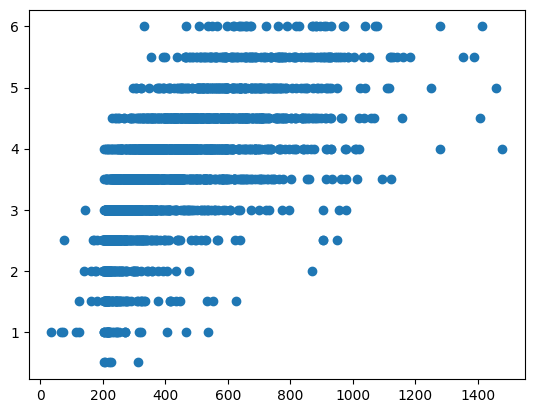

duration_mean


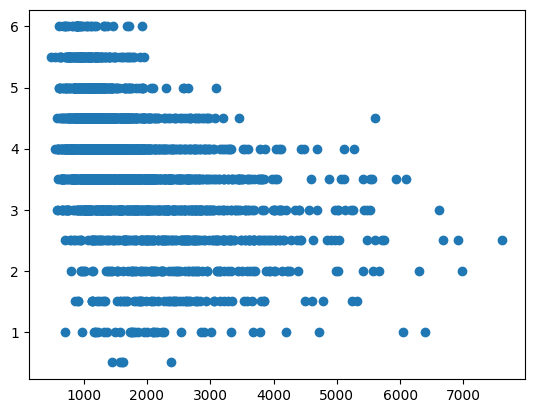

duration_min


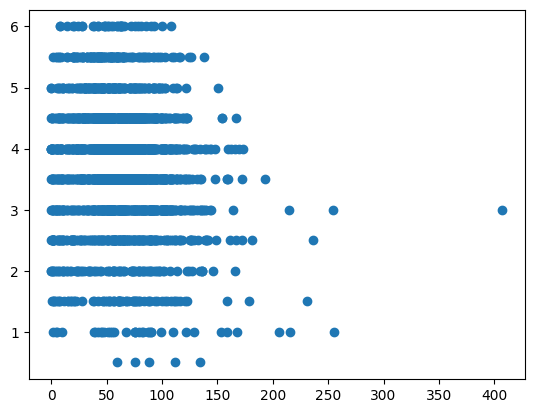

duration_max


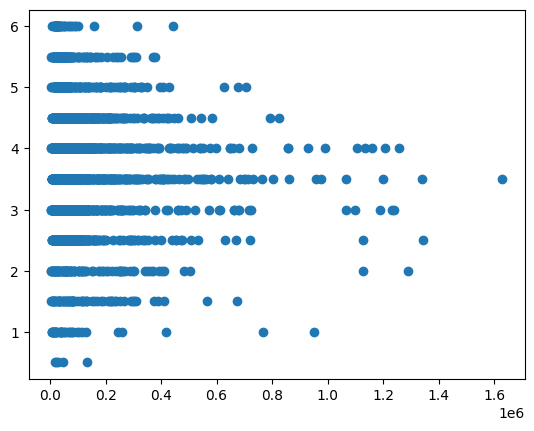

duration_first


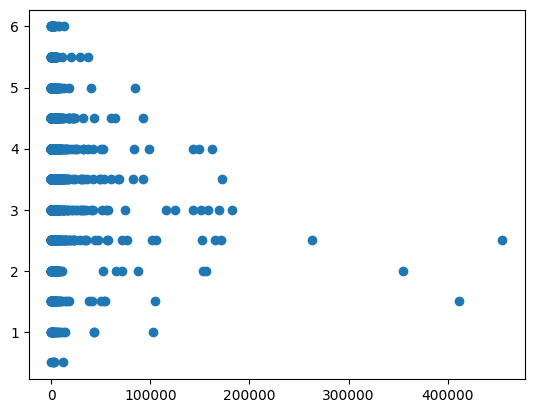

duration_last


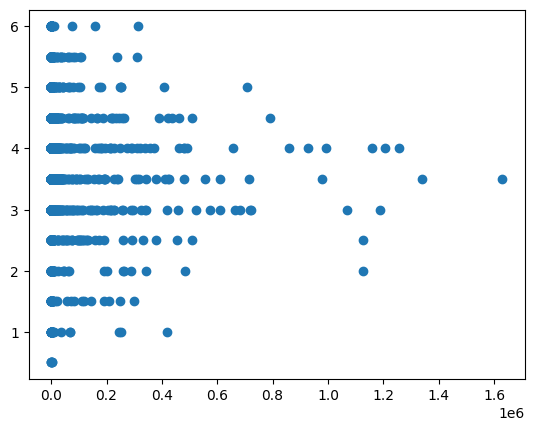

duration_median


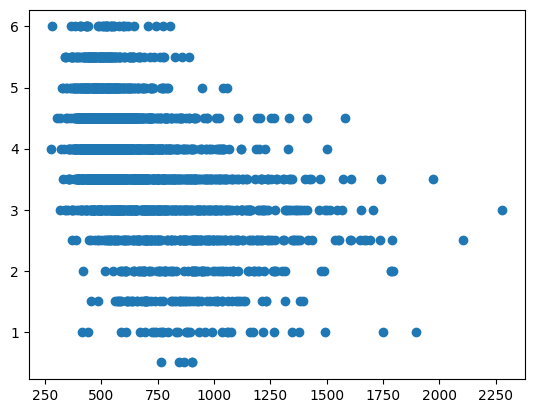

duration_sum


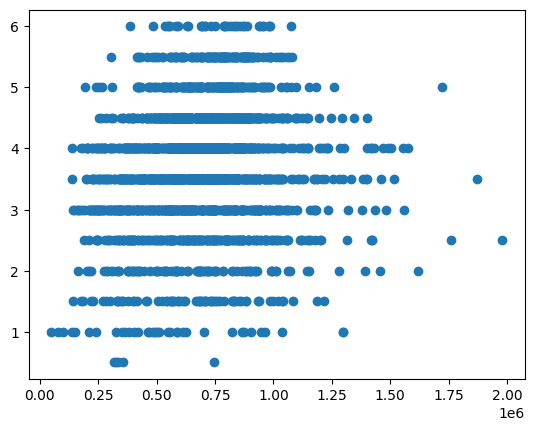

intraword pause_count


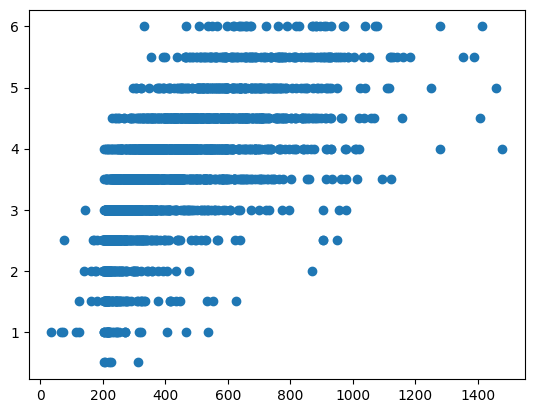

intraword pause_mean


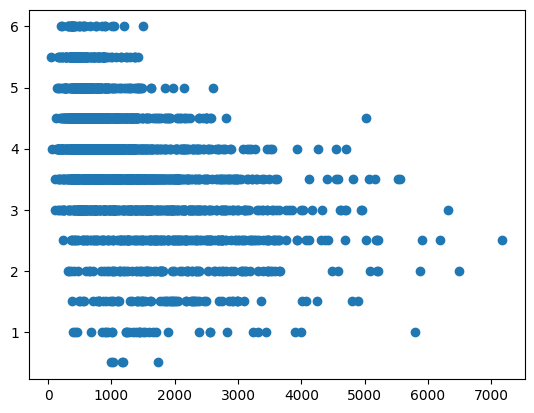

intraword pause_min


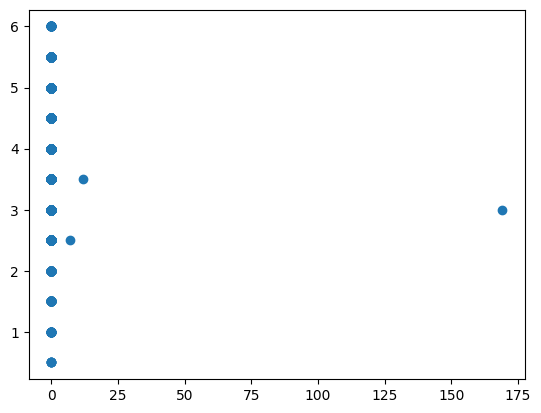

intraword pause_max


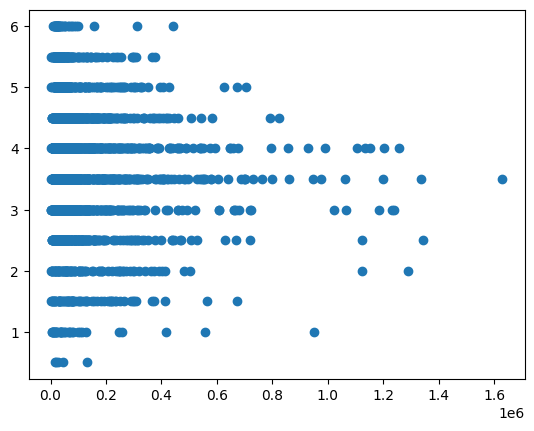

intraword pause_first


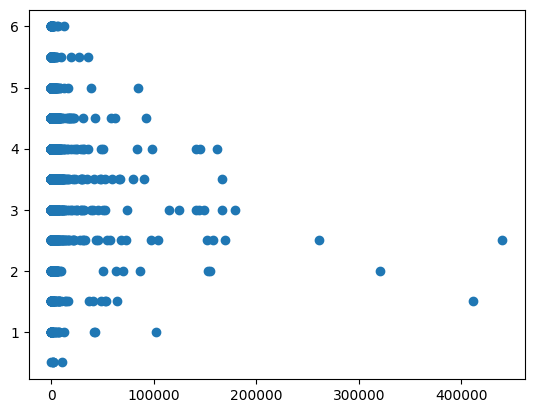

intraword pause_last


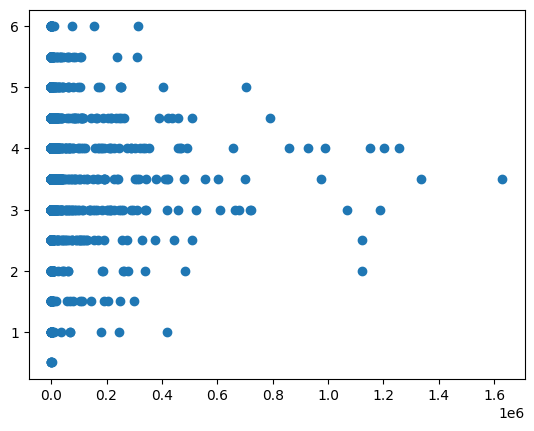

intraword pause_median


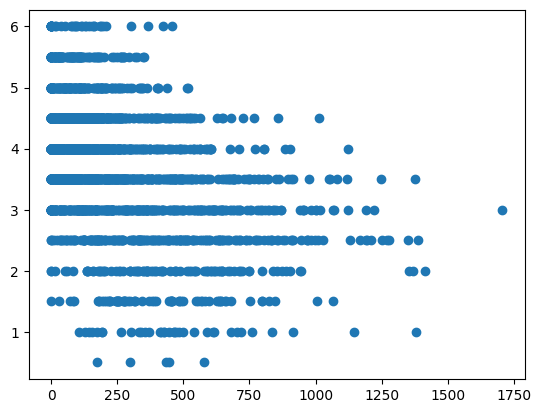

intraword pause_sum


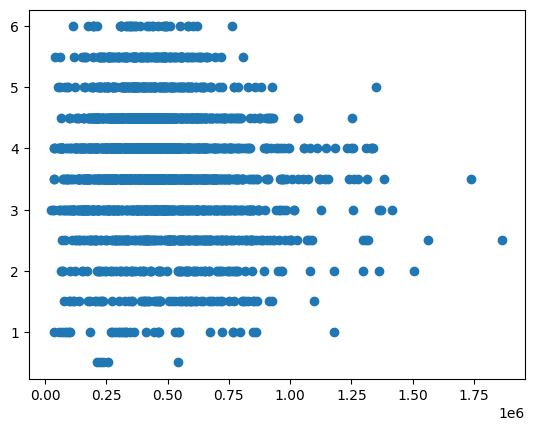

IWD_count


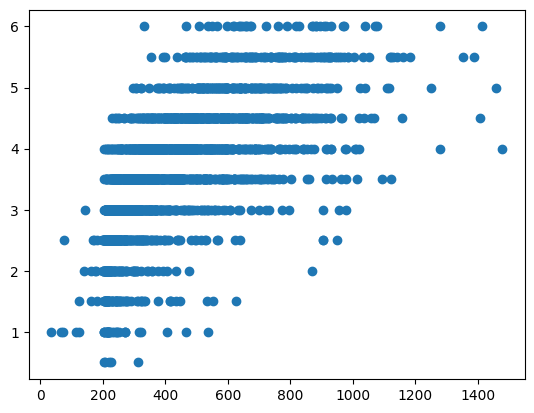

IWD_mean


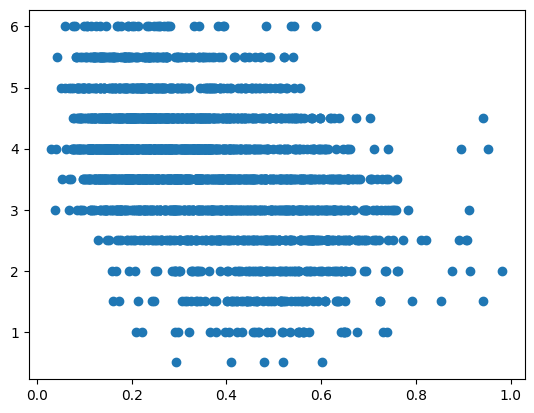

IWD_min


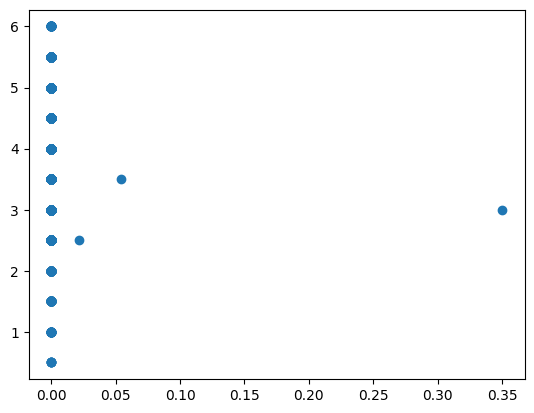

IWD_max


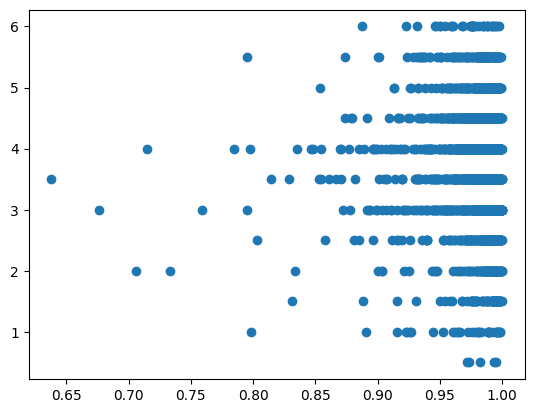

IWD_first


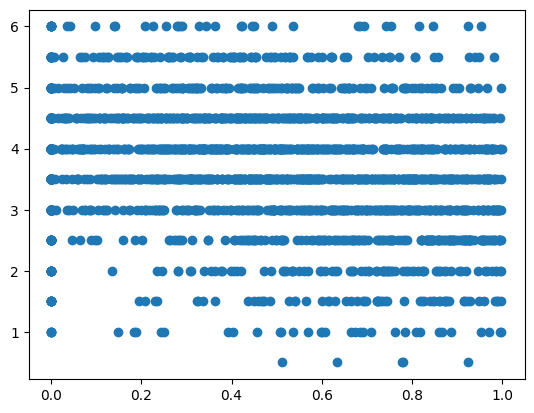

IWD_last


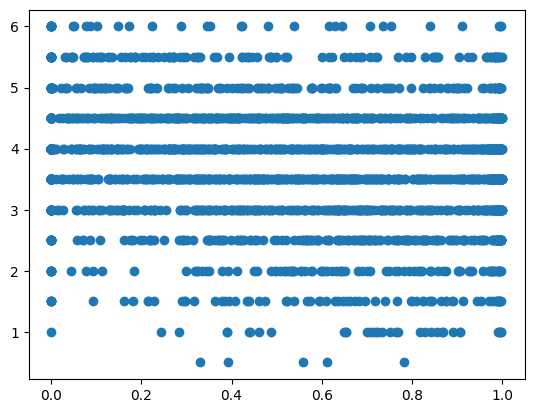

IWD_median


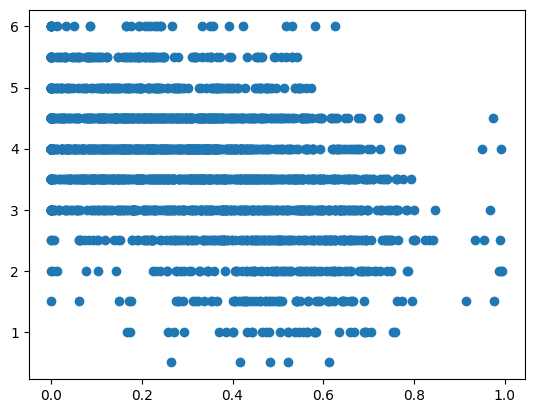

IWD_sum


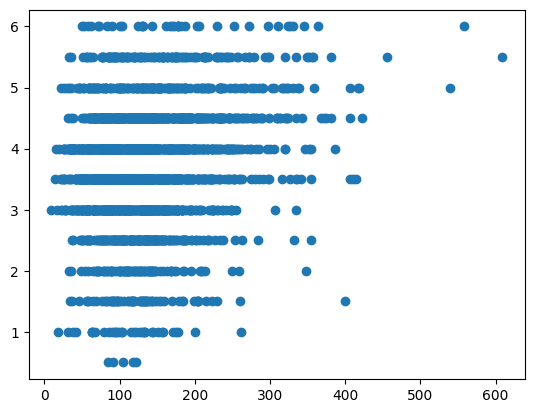

score


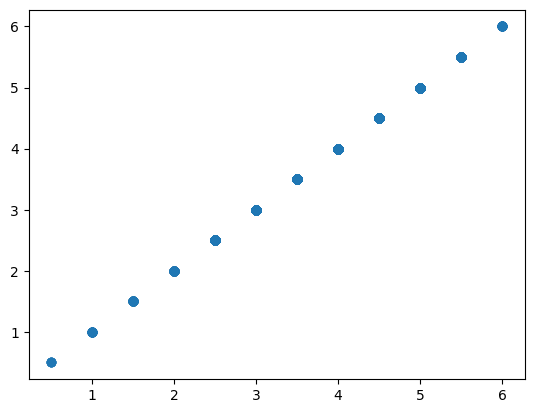

In [10]:
for col in temp_df.columns:
    if col not in ['id']:
        print(col)
        plt.plot(temp_df[col], temp_df['score'], 'o')
        plt.show()

In [6]:
temp_df#.sort_values('intraword pause', ascending=False)

,id,duration_count,duration_mean,duration_min,duration_max,duration_first,duration_last,duration_median,duration_sum,intraword pause_count,...,intraword pause_median,intraword pause_sum,IWD_count,IWD_mean,IWD_min,IWD_max,IWD_first,IWD_last,IWD_median,IWD_sum
0,001519c8,313,1854.214058,63,61752,1166,1380,624.0,580369,313,...,36.0,391790,313,0.220967,0.0,0.985992,0.429674,0.577536,0.088235,69.162764
1,0022f953,349,2612.063037,63,281736,424,726,504.0,911610,349,...,68.0,738861,349,0.251708,0.0,0.992536,0.000000,0.279614,0.153333,87.846223
2,0042269b,549,702.193078,42,14973,702,390,439.0,385504,549,...,0.0,113135,549,0.106574,0.0,0.953850,0.000000,0.087179,0.000000,58.509164
3,0059420b,218,3100.770642,75,177054,3104,1289,1085.0,675968,218,...,529.5,550093,218,0.496408,0.0,0.994928,0.853415,0.792863,0.508486,108.216855
4,0075873a,328,1705.737805,30,64486,2449,12261,613.0,559482,328,...,46.0,350111,328,0.181921,0.0,0.975793,0.226623,0.818367,0.087663,59.670157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,584,1016.775685,75,88931,271,88931,543.5,593797,584,...,7.5,271507,584,0.137559,0.0,0.987778,0.180812,0.981705,0.014560,80.334273
2467,ffbef7e5,448,1338.058036,58,31864,1416,746,832.0,599450,448,...,498.5,443704,448,0.570789,0.0,0.974050,0.690678,0.663539,0.632891,255.713451
2468,ffccd6fd,204,2783.602941,78,79614,1495,2732,1233.0,567855,204,...,796.0,470588,204,0.635143,0.0,0.978945,0.565886,0.863836,0.663552,129.569240
2469,ffec5b38,455,1749.610989,51,184968,2455,976,685.0,796073,455,...,272.0,581657,455,0.387123,0.0,0.994010,0.491650,0.618852,0.399160,176.140912


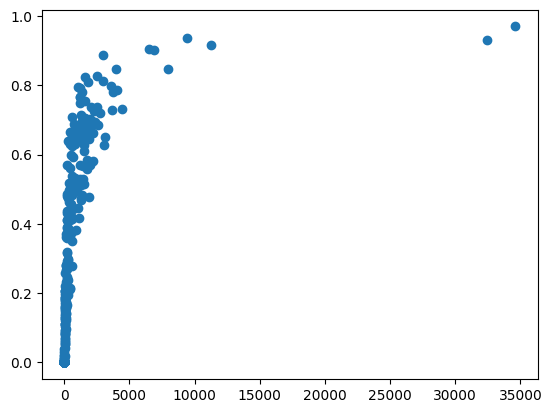

In [7]:
id_ = temp_df['id'].unique()[1350]
y = temp_df[temp_df['id']==id_]
plt.plot(y['intraword pause'], y['IWD'], 'o')

-274877906944.0
274877906943.99997


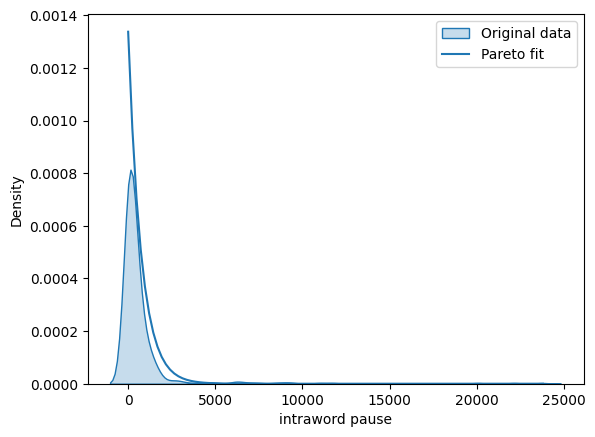

In [58]:
id_ = temp_df['id'].unique()[111]
y = temp_df[temp_df['id']==id_]

# Drop pauses with more than 2 minutes
y = y[y['intraword pause'] < 120*1000]

# Remove missing or NaN values
y = y.dropna(subset=['intraword pause'])

# Fit a Pareto distribution to the data
b, loc, scale = stats.pareto.fit(y['intraword pause'])

print(loc)
print(scale)

# Generate a range of values for x
x = np.linspace(y['intraword pause'].min(), y['intraword pause'].max(), 100)

# Generate the pdf of the Pareto distribution
pdf = stats.pareto.pdf(x, b, loc, scale)

# Plot the original data and the fitted distribution
sns.kdeplot(data=y, x='intraword pause', bw_adjust=0.5, fill=True, label='Original data')
plt.plot(x, pdf, label='Pareto fit')
plt.legend()

<AxesSubplot: xlabel='intraword pause', ylabel='Density'>

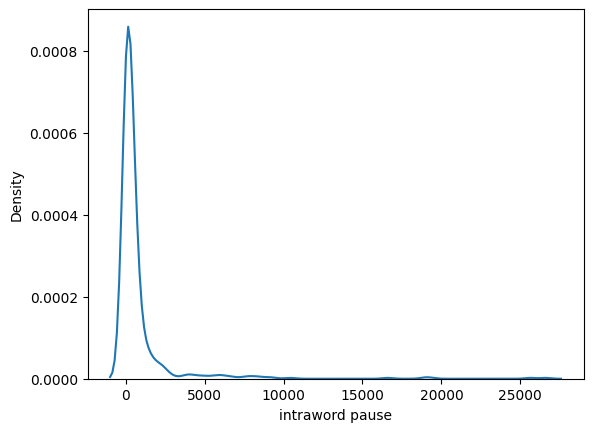

In [45]:
import seaborn as sns

id_ = temp_df['id'].unique()[2000]
y = temp_df[temp_df['id']==id_]

sns.kdeplot(data=y, x='intraword pause', bw_adjust=0.5)

In [26]:
y['intraword pause'].max()

24389.0

shape: 1.1975701044889664
loc: 0.0
scale: 207.548458667033


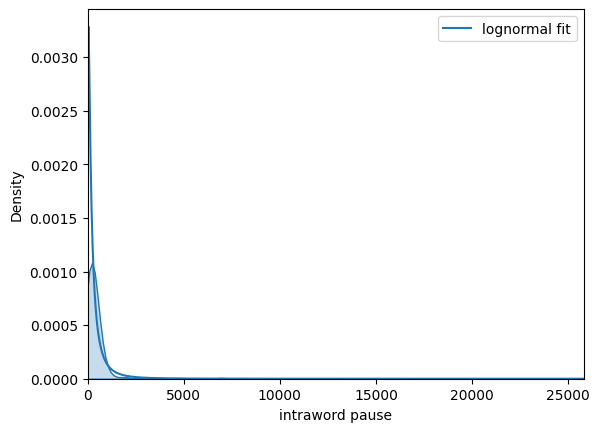

In [41]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

id_ = temp_df['id'].unique()[1117]
y = temp_df[temp_df['id']==id_]

# Drop pauses with more than 2 minutes
y = y[y['intraword pause'] < 30*1000]

# # Remove missing or NaN values
# y = y.dropna(subset=['intraword pause'])

# # # Replace values that are exactly 0 with a small positive number
# y.loc[y['intraword pause'] == 0, 'intraword pause'] = 1e-10

y = y[y['intraword pause'] > 0]

# # Replace very small values with a small positive number
# y.loc[y['intraword pause'] < 1e-10, 'intraword pause'] = 1e-10

# Fit a lognormal distribution to the data
shape, loc, scale = stats.lognorm.fit(y['intraword pause'], floc=0)

print('shape:', shape)
print('loc:', loc)
print('scale:', scale)

# Generate a range of values for x
x = np.linspace(y['intraword pause'].min(), y['intraword pause'].max(), 1000)

# Generate the pdf of the lognormal distribution
pdf = stats.lognorm.pdf(x, shape, loc, scale)

# Plot the original data and the fitted distribution
sns.kdeplot(data=y, x='intraword pause', bw_adjust=0.5, fill=True)
plt.plot(x, pdf, label='lognormal fit')
# plt.yscale('log')
plt.xlim(0, y['intraword pause'].max())
plt.legend()
plt.show()

In [43]:
# Fit a stable distribution to the data
alpha, beta, loc, scale = stats.levy_stable._fitstart(y['intraword pause'])
params = stats.levy_stable.fit(y['intraword pause'])

print('alpha:', params[0])
print('beta:', params[1])
print('loc:', params[2])
print('scale:', params[3])

# Generate a range of values for x
x = np.linspace(y['intraword pause'].min(), y['intraword pause'].max(), 100)

# Generate the pdf of the stable distribution
pdf = stats.levy_stable.pdf(x, params[0], params[1], loc=params[2], scale=params[3])

# Plot the original data and the fitted distribution
sns.kdeplot(data=y, x='intraword pause', bw_adjust=0.5, fill=True)
plt.plot(x, pdf, label='stable fit')
plt.legend()

KeyboardInterrupt: 

In [252]:
y['intraword pause'].min()

0

In [197]:
x = df[df['id']=='001519c8']


C:\Users\luis.pinto1\AppData\Local\Temp\ipykernel_2812\3475237422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['word_group'] = (x['word_count'].diff() > 0).cumsum()


In [198]:
x.loc[2455:2480]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,word_group
2455,001519c8,2456,1514967,1515096,129,Input,q,q,q,1299,252,282
2457,001519c8,2458,1515376,1515499,123,Input,q,q,q,1301,253,283
2458,001519c8,2459,1515480,1515576,96,Input,q,q,q,1302,253,283
2459,001519c8,2460,1515555,1515741,186,Input,q,q,q,1303,253,283
2460,001519c8,2461,1515689,1515817,128,Input,q,q,q,1304,253,283
2461,001519c8,2462,1515812,1515932,120,Input,q,q,q,1305,253,283
2463,001519c8,2464,1516803,1516939,136,Input,q,q,q,1307,254,284
2464,001519c8,2465,1516858,1516996,138,Input,q,q,q,1308,254,284
2466,001519c8,2467,1517165,1517269,104,Input,q,q,q,1310,255,285
2467,001519c8,2468,1517244,1517370,126,Input,q,q,q,1311,255,285


In [193]:
x[x['']].tail(40)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,word_group
2517,001519c8,2518,1735709,1735734,25,Nonproduction,Leftclick,Leftclick,NoChange,467,256,347
2518,001519c8,2519,1737753,1737850,97,Nonproduction,ArrowRight,ArrowRight,NoChange,467,256,347
2519,001519c8,2520,1738239,1738343,104,Nonproduction,ArrowLeft,ArrowLeft,NoChange,466,256,347
2520,001519c8,2521,1739102,1739125,23,Remove/Cut,Backspace,Backspace,q,465,256,347
2521,001519c8,2522,1739192,1739262,70,Remove/Cut,Backspace,Backspace,q,464,256,347
2522,001519c8,2523,1739348,1739407,59,Remove/Cut,Backspace,Backspace,q,463,256,347
2523,001519c8,2524,1739504,1739552,48,Remove/Cut,Backspace,Backspace,q,462,256,347
2524,001519c8,2525,1739624,1739702,78,Remove/Cut,Backspace,Backspace,q,461,256,347
2525,001519c8,2526,1739805,1739849,44,Remove/Cut,Backspace,Backspace,q,460,255,347
2526,001519c8,2527,1741410,1741538,128,Input,q,q,q,461,256,348


In [182]:
df[df['id']=='001519c8']['word_group'].nunique()

303

In [132]:
# Filter the data to only include 'Input' actions
df = df[df['activity'] == 'Input']

In [133]:
df['down_event'].unique()

array(['q', 'Space', '.', ',', 'Enter', "'", ';', '-', '?', '"', '=', '/',
       ':', 'z', '[', '$', '(', ')', '+', '\\', '*', '&', '!', '%', '>',
       '<', ']', '@', '\x96', '{', '¿', '}', '^', '`', '\x9b', '#', '~',
       '_', 'Ä±', '|', 'â\x80\x93', '\x97', 'Ë\x86', '¡', '\x80', 'Â´',
       'Å\x9f', 'ä'], dtype=object)

In [134]:
df[df['id']=='0022f953']['down_time'].diff()

2559      NaN
2560    120.0
2561     96.0
2562     88.0
2563     96.0
        ...  
4911    259.0
4912    157.0
4913    152.0
4914    232.0
4915     80.0
Name: down_time, Length: 1938, dtype: float64

## Sentence IKIs

In [135]:
AGGREGATIONS = ['count', 'mean', 'min', 'max', 'first', 'last','median', 'sum'] #, q0, q4, 'sem', 'std', 'var', 'skew', pd.DataFrame.kurt]

In [136]:
def calculate_IKI(df, down_event, aggregations):

    # Filter the DataFrame
    df_periods = df[df['down_event'] == down_event]

    # Calculate the interkeystroke intervals (IKIs) for each ID
    df_periods["down_time_diff"] = df_periods.groupby("id")["down_time"].diff()
    df_periods = df_periods[~df_periods["down_time_diff"].isnull()]

    # Calculate the IKI statistics for each ID
    # df_periods = df_periods.groupby('id')['down_time_diff'].agg(aggregations).reset_index()

    return df_periods

In [137]:
df = calculate_IKI(df, down_event='Space', aggregations=AGGREGATIONS)

C:\Users\luis.pinto1\AppData\Local\Temp\ipykernel_2812\4276084465.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_periods["down_time_diff"] = df_periods.groupby("id")["down_time"].diff()


In [138]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,down_time_diff
13,001519c8,14,108341,108486,145,Input,Space,Space,,11,2,501.0
21,001519c8,22,110848,110989,141,Input,Space,Space,,17,3,2507.0
28,001519c8,29,111978,112122,144,Input,Space,Space,,24,4,1130.0
31,001519c8,32,112359,112478,119,Input,Space,Space,,27,5,381.0
36,001519c8,37,113304,113446,142,Input,Space,Space,,30,6,945.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8405850,fff05981,3572,2022778,2022846,68,Input,Space,Space,,1482,239,880.0
8405858,fff05981,3580,2024338,2024390,52,Input,Space,Space,,1490,240,1560.0
8405864,fff05981,3586,2026714,2026766,52,Input,Space,Space,,1496,241,2376.0
8405876,fff05981,3598,2039011,2039118,107,Input,Space,Space,,1490,240,12297.0


In [62]:
scores = pd.read_csv('../data/train_scores.csv')

In [162]:
def process_id(group):
    # Extract data
    data = group['down_time_diff'].values

    # Make sure your data is a numpy array of floats
    data = np.array(data, dtype=np.float64)

    # Apply the MFDFA function
    lag = np.logspace(0.7, 4, 30).astype(int)  # scales (lag) from 5 to 5000
    q = 0.5  # q from -5 to 5 with 50 points
    order = 2  # order of the polynomial fitting

    # Get the (MF)DFA as
    lag, dfa = MFDFA(data, lag=lag, q=q, order=order)

    try:
        # Drop NaN values from lag and dfa
        mask = ~np.isnan(dfa).flatten()
        lag, dfa = lag[mask], dfa[mask]

        # Fit a polynomial of order 2 to the log-transformed data
        coeffs = np.polyfit(np.log10(lag), np.log10(dfa.flatten()), 2)

        return coeffs[0], coeffs[1], coeffs[2]
    except:
        return 0, 0, 0

    # # Return the ID and the fitted polynomial coefficients
    # return pd.Series({'id': group['id'].iloc[0], 'coeffs': coeffs})

# Apply the function to each group in the DataFrame
result = df.groupby('id').apply(process_id).reset_index(drop=False)

c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [163]:
result.columns = ['id', 'coeffs']

# Convert the 'coeffs' column to a list and then to a DataFrame
coeffs_df = pd.DataFrame(result['coeffs'].tolist(), columns=['coeff1', 'coeff2', 'coeff3'])

# Concatenate the new DataFrame with the original DataFrame
result = pd.concat([result['id'], coeffs_df], axis=1)

In [164]:
result = result.merge(scores, on='id')

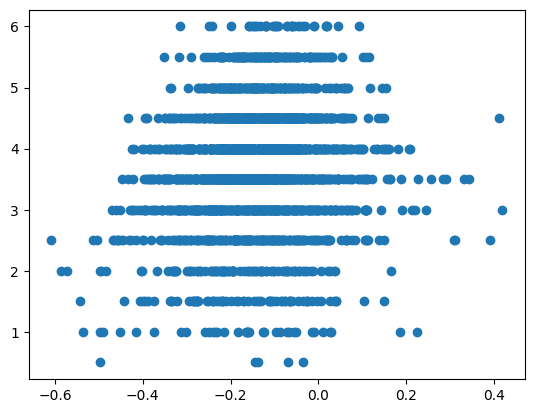

In [165]:
plt.plot(result['coeff1'], result['score'], 'o')

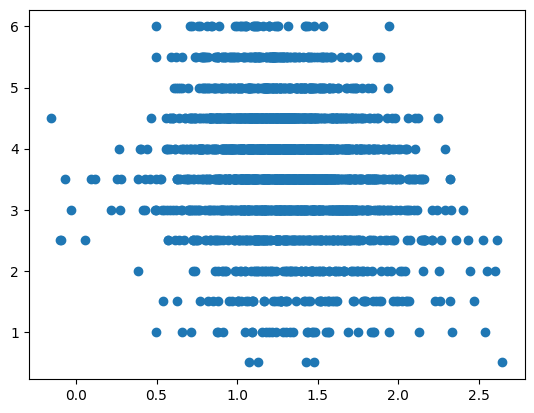

In [166]:
plt.plot(result['coeff2'], result['score'], 'o')

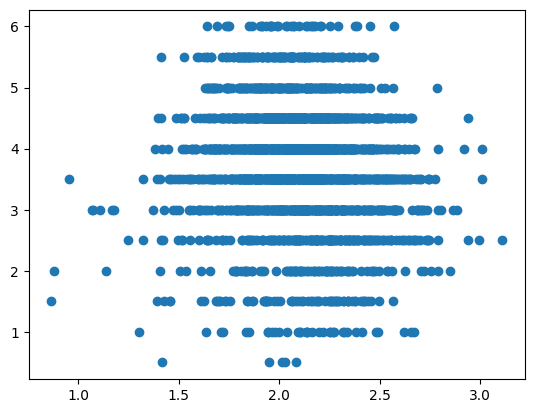

In [167]:
plt.plot(result['coeff3'], result['score'], 'o')

In [168]:
sys.exit()

NameError: name 'sys' is not defined

In [ ]:
a

KeyError: "['coeff1' 'coeff2' 'coeff3'] not in index"

In [ ]:
a

c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


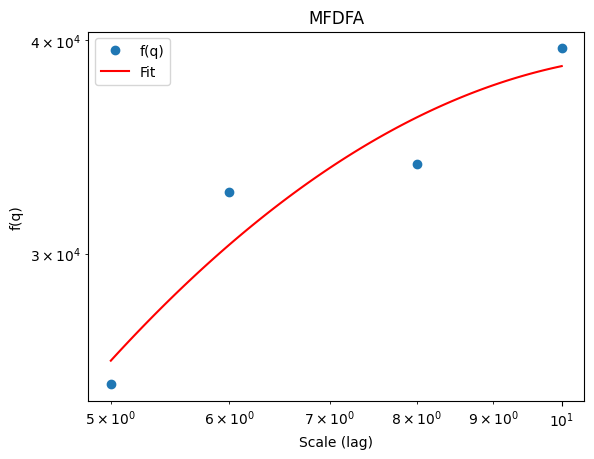

In [ ]:
from MFDFA import MFDFA
from MFDFA import fgn
import numpy as np
import matplotlib.pyplot as plt

# Prepare your data
id_ = df['id'].unique()[1200]
x = df[df['id']==id_][['id','down_time_diff']]
data = x['down_time_diff'].values

# Make sure your data is a numpy array of floats
data = np.array(data, dtype=np.float64)

# Apply the MFDFA function
lag = np.logspace(0.7, 4, 30).astype(int)  # scales (lag) from 5 to 5000
q = 11/10  # q from -5 to 5 with 50 points
order = 2  # order of the polynomial fitting

# Get the (MF)DFA as
lag, dfa = MFDFA(data, lag=lag, q=q, order=order)

# Drop NaN values from lag and dfa
mask = ~np.isnan(dfa).flatten()
lag, dfa = lag[mask], dfa[mask]

# Fit a polynomial of order 2 to the log-transformed data
coeffs = np.polyfit(np.log10(lag), np.log10(dfa.flatten()), 2)

# Generate the fitted polynomial
poly = np.poly1d(coeffs)
lag_fit = np.logspace(np.log10(lag.min()), np.log10(lag.max()), 100)
dfa_fit = 10**poly(np.log10(lag_fit))

# Now you can plot your results
plt.loglog(lag, dfa, 'o', label='f(q)')
plt.loglog(lag_fit, dfa_fit, 'r-', label='Fit')

plt.xlabel('Scale (lag)')
plt.ylabel('f(q)')
plt.title('MFDFA')
plt.legend()
plt.show()

In [ ]:
mask.flatten()

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
dfa_fit

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
np.log10(dfa.flatten())

array([4.19027003, 4.30708298, 4.3512397 , 4.40031938, 4.41264153,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [ ]:
dfa

array([[15497.79932599],
       [20280.70195315],
       [22451.20744165],
       [25137.34373764],
       [25860.7744158 ],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [           nan]])

In [ ]:
np.log10(lag_fit)

array([0.69897   , 0.73231374, 0.76565748, 0.79900122, 0.83234495,
       0.86568869, 0.89903243, 0.93237617, 0.9657199 , 0.99906364,
       1.03240738, 1.06575111, 1.09909485, 1.13243859, 1.16578233,
       1.19912606, 1.2324698 , 1.26581354, 1.29915728, 1.33250101,
       1.36584475, 1.39918849, 1.43253223, 1.46587596, 1.4992197 ,
       1.53256344, 1.56590717, 1.59925091, 1.63259465, 1.66593839,
       1.69928212, 1.73262586, 1.7659696 , 1.79931334, 1.83265707,
       1.86600081, 1.89934455, 1.93268829, 1.96603202, 1.99937576,
       2.0327195 , 2.06606323, 2.09940697, 2.13275071, 2.16609445,
       2.19943818, 2.23278192, 2.26612566, 2.2994694 , 2.33281313,
       2.36615687, 2.39950061, 2.43284435, 2.46618808, 2.49953182,
       2.53287556, 2.56621929, 2.59956303, 2.63290677, 2.66625051,
       2.69959424, 2.73293798, 2.76628172, 2.79962546, 2.83296919,
       2.86631293, 2.89965667, 2.93300041, 2.96634414, 2.99968788,
       3.03303162, 3.06637535, 3.09971909, 3.13306283, 3.16640

In [ ]:
dfa_fit

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
x = df_periods.groupby('id')['IKI sentences'].apply(lambda x: list(x)).reset_index()

In [ ]:
x#.loc[1]['IKI sentences']

,id,IKI sentences
0,001519c8,"[133228.0, 13411.0, 70062.0, 36560.0, 163446.0..."
1,0022f953,"[-1410950.0, 33381.0, 20280.0, 89231.0, 21752...."
2,0042269b,"[-793489.0, 55161.0, 193110.0, 15440.0, 36070...."
3,0059420b,"[-1533089.0, 151776.0, 86864.0, 57823.0, 34111..."
4,0075873a,"[-1273223.0, 237.0, 2008.0, 1451.0, 217.0, 166..."
...,...,...
2465,ffb8c745,"[-1470590.0, 19752.0, 28639.0, 74525.0, 21046...."
2466,ffbef7e5,"[-1494010.0, 134829.0, 70243.0, 70078.0, 85471..."
2467,ffccd6fd,"[-1522471.0, 239426.0, 71347.0, 445678.0, 4216..."
2468,ffec5b38,"[-1409319.0, 38064.0, 49685.0, 46833.0, 67316...."


In [ ]:
x

,id,count,mean,min,max,first,last,median,sum
0,001519c8,20,65075.500000,5138.0,163446.0,133228.0,63589.0,56605.5,1301510.0
1,0022f953,15,-36811.000000,-1410950.0,155395.0,-1410950.0,155395.0,44553.0,-552165.0
2,0042269b,21,40381.380952,-793489.0,211835.0,-793489.0,98206.0,64147.0,848009.0
3,0059420b,13,-28101.692308,-1533089.0,224225.0,-1533089.0,42286.0,82654.0,-365322.0
4,0075873a,23,8464.956522,-1273223.0,305820.0,-1273223.0,305820.0,17609.0,194694.0
...,...,...,...,...,...,...,...,...,...
2465,ffb8c745,43,2032.395349,-1470590.0,177913.0,-1470590.0,66004.0,21046.0,87393.0
2466,ffbef7e5,31,6330.064516,-1494010.0,411749.0,-1494010.0,95821.0,39383.0,196232.0
2467,ffccd6fd,5,-68882.200000,-1522471.0,445678.0,-1522471.0,421609.0,239426.0,-344411.0
2468,ffec5b38,31,-3834.354839,-1409319.0,190305.0,-1409319.0,190305.0,35056.0,-118865.0


In [ ]:
x.groupby('id')['IKI sentences'].agg(AGGREGATIONS)

TypeError: complex() first argument must be a string or a number, not 'list'

In [ ]:
# Calculate the interkeystroke intervals (IKIs) for each ID
df["down_time_diff"] = df.groupby("id")["down_time"].diff()
df = df.groupby("id")["down_time_diff"].apply(lambda x: list(x)[1:]).reset_index()
df.columns = ["id", "IKIs"]
df["IKIs"] = df["IKIs"].apply(lambda x: x[:1000])

In [ ]:
# def monofractal_analysis(iki_time_series):
#     """
#     Performs monofractal analysis on the given IKI time series.
#     """

#     # Calculate the fluctuation function F2(s) for different values of s.
#     s_values = np.logspace(-1, 1, 100)
#     f2_values = np.zeros(len(s_values))
#     for i, s in enumerate(s_values):
#         f2_values[i] = np.mean(np.abs(np.cumsum(iki_time_series) - np.mean(iki_time_series)) ** 2 / s ** 2)

#     # Perform a log-log regression of F2(s) on s.
#     slope, intercept, r_value, p_value, std_err = linregress(np.log10(s_values), np.log10(f2_values))

#     # The Hurst exponent is equal to the slope of the regression line.
#     hurst_exponent = slope

#     return hurst_exponent, p_value

# def multifractal_analysis(iki_time_series):
#     """
#     Performs multifractal analysis on the given IKI time series.
#     """

#     # Calculate the fluctuation function Fq(s) for different values of s and q.
#     s_values = np.logspace(-1, 1, 100)
#     q_values = np.linspace(-3, 3, 101)
#     fq_values = np.zeros((len(q_values), len(s_values)))
#     for i, s in enumerate(s_values):
#         for j, q in enumerate(q_values):
#             fq_values[j, i] = np.mean(np.abs(np.cumsum(iki_time_series) - np.mean(iki_time_series)) ** q / s ** q)

#     # Perform a log-log regression of Fq(s) on s for each value of q.
#     h_q_values = np.zeros(len(q_values))
#     p_values = np.zeros(len(q_values))
#     for i, q in enumerate(q_values):
#         slope, intercept, r_value, p_values[i], std_err = linregress(np.log10(s_values), np.log10(fq_values[i, :]))
#         h_q_values[i] = slope

#     # The multifractal spectrum is given by the q-order Hurst exponents.
#     multifractal_spectrum = h_q_values

#     return multifractal_spectrum, p_values

# def fractal_analysis(iki_time_series):
#     """
#     Performs both monofractal and multifractal analysis on the given IKI time series.
#     """

#     hurst_exponent, p_value = monofractal_analysis(iki_time_series)
#     multifractal_spectrum, p_values = multifractal_analysis(iki_time_series)

#     return hurst_exponent, multifractal_spectrum, p_values

In [ ]:
@njit(parallel=True)
def linregress_numba(x, y):
    A = np.empty((len(x), 2))
    A[:, 0] = x
    A[:, 1] = 1
    A_inv = np.linalg.inv(A.T @ A) @ A.T
    m, c = A_inv @ y
    return m, c

@njit(parallel=True)
def monofractal_analysis(iki_time_series):
    s = 11/10
    cumsum_iki = np.cumsum(iki_time_series) - np.mean(iki_time_series)
    f2_value = np.mean(np.abs(cumsum_iki) ** 2 / s ** 2)
    hurst_exponent = np.log2(f2_value) / 2
    return hurst_exponent

@njit(parallel=True)
def multifractal_analysis(iki_time_series):
    s_values = np.logspace(-1, 1, 100)
    q_values = np.linspace(-3, 3, 101)
    fq_values = np.zeros((len(q_values), len(s_values)))
    cumsum_iki = np.cumsum(iki_time_series) - np.mean(iki_time_series)
    for i in prange(len(s_values)):
        s = s_values[i]
        for j in prange(len(q_values)):
            q = q_values[j]
            fq_values[j, i] = np.mean(np.abs(cumsum_iki) ** q / s ** q)
    h_q_values = np.zeros(len(q_values))
    for i in prange(len(q_values)):
        q = q_values[i]
        slope, intercept = linregress_numba(np.log10(s_values), np.log10(fq_values[i, :]))
        h_q_values[i] = slope
    multifractal_spectrum = h_q_values
    return multifractal_spectrum

# def fractal_analysis(iki_time_series):
#     """
#     Performs both monofractal and multifractal analysis on the given IKI time series.
#     """

#     hurst_exponent = monofractal_analysis(iki_time_series)
#     multifractal_spectrum = multifractal_analysis(iki_time_series)

#     return hurst_exponent, multifractal_spectrum

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def linear_func(t, a, b):
    return a * t + b

def MFDFA(time_series, s):
    # Step 1: Integration
    Y = np.cumsum(time_series - np.mean(time_series))

    # Step 2: Partition
    N = len(Y)
    s = int(s) if s > 2 else 2  # ensure s is an integer and at least 2
    n_s = int(np.floor(N / s))
    Y = Y[:n_s*s]  # truncate Y to a multiple of s
    Y = np.reshape(Y, (n_s, s))  # reshape Y into a 2D array

    # Step 3: Detrending
    x = np.arange(s)
    Y_detrended = np.zeros_like(Y)
    for i in range(n_s):
        popt, _ = curve_fit(linear_func, x, Y[i, :])
        Y_detrended[i, :] = Y[i, :] - linear_func(x, *popt)

    # Step 4: Fluctuation
    F2 = np.mean(Y_detrended**2, axis=1)

    # Step 5: Scaling
    Fq = np.mean(F2**(0.5))

    # Step 6: Multifractal Spectrum
    hq = 0.5
    tq = hq * 2
    Dq = tq - hq * 2 + 1

    return hq, Dq

# Assuming your DataFrame is named `df` and the time series data is in the 'IKIs' column
time_series_data = np.array(df.loc[1109]['IKIs'])

hq, Dq = MFDFA(time_series_data, s=11/10)

print("hq: ", hq)
print("Dq: ", Dq)

hq:  0.5
Dq:  1.0


In [ ]:
# df['IKIs'] = df['IKIs'].apply(np.array)
# results = df['IKIs'].apply(MFDFA)

In [ ]:
# # Convert the results to a DataFrame
# results_df = pd.DataFrame(results.tolist(), columns=['husrt exponent', 'multifractal spectrum'])